In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import fitsio
#https://pypi.org/project/fitsio/

# --- GALAXY-BGS ---

In [6]:
fits_tru = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_true_mod.fits')

In [7]:
fits_tar = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_tar_mod.fits')

In [8]:
#funtion to select specific data from the original data_set


def select_dataset(name_to_select, target_column, true_data, tar_data):
    
    '''
    returns data_set_1 and data-set_2 with only the data corresponding to name_to_select
    '''
    n_rows = len(true_data[1][target_column][:])

    true_array_to_return = []
    tar_array_to_return = []
    for i in range(n_rows):
        name_in_file = true_data[1][target_column][i]
        if name_to_select == name_in_file:
            true_array_to_return.append(true_data[1][i])
            tar_array_to_return.append(tar_data[1][i])
            
    true_array_to_return = array(true_array_to_return)
    tar_array_to_return = array(tar_array_to_return)
    
    return true_array_to_return, tar_array_to_return

    

In [9]:
#getting the data of only the rows thar are LRG:
true_1, tar_2 = select_dataset(b'BGS       ', 'TEMPLATETYPE', fits_tru, fits_tar)

In [10]:
#create the fits file for LRG only
BGS_file_true = fitsio.FITS('BGS_true', 'rw')
BGS_file_tar = fitsio.FITS('BGS_tar', 'rw')

In [14]:
#adds the data in true_1 y tar_2 to the LRG fits files:
BGS_file_true.write(true_1)
BGS_file_tar.write(tar_2)

(-0.1, 0.9)

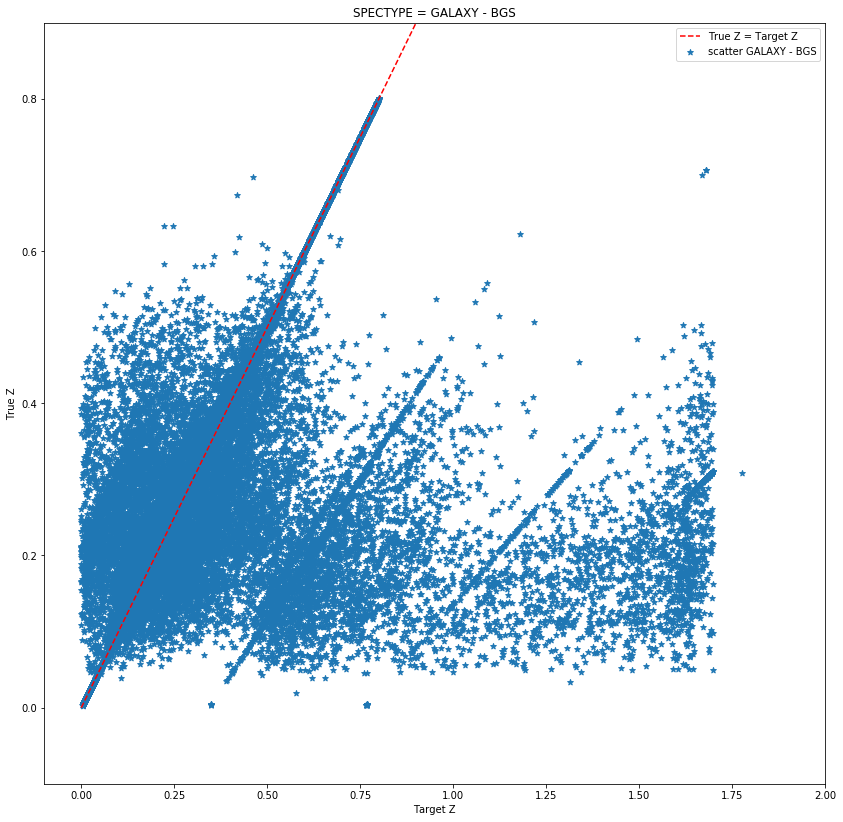

In [20]:
#Relacion entre TARGET Z y TRUE Z para SPECTYPE= GALAXY - TYPE BGS . 
x_f = linspace(0, 4.0, 100)

fig, ax = subplots(figsize=(14, 14))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter( BGS_file_tar[1]['Z'][:], BGS_file_true[1]['TRUEZ'][:],marker='*')
ax.legend(('True Z = Target Z', 'scatter GALAXY - BGS'))
ax.set_ylabel('True Z')
ax.set_xlabel('Target Z')
ax.set_title('SPECTYPE = GALAXY - BGS')
ax.set_xlim(-0.1, 2.0)
ax.set_ylim(-0.1, 0.9)

(-0.1, 2.0)

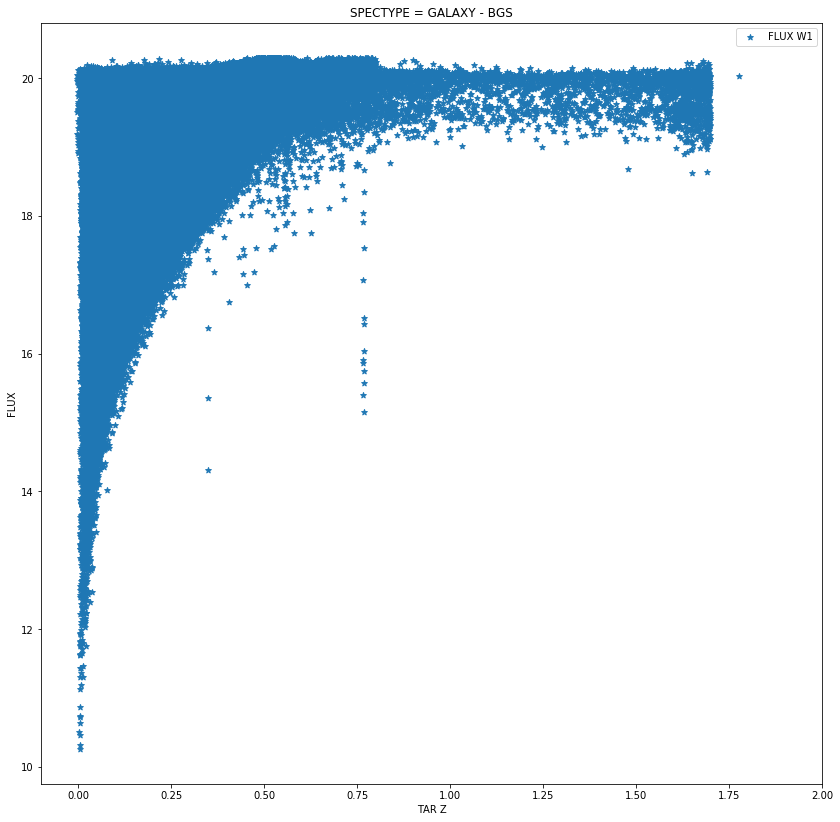

In [43]:
# Vamos a ver por qué se forman esos subgrupos. 

fig, ax = subplots(figsize=(14, 14))
ax.scatter(BGS_file_tar[1]['Z'][:], BGS_file_true[1]['MAG'][:], marker='*')

#ax.scatter(BGS_file_tar[1]['Z'][:], BGS_file_tar[1]['FLUX_R'][:], marker='*', color='g')

#ax.scatter(BGS_file_tar[1]['Z'][:], BGS_file_tar[1]['FLUX_W2'][:], marker='*', color='B')


ax.legend(('FLUX W1', 'FLUX W2', 'FLUX Z'))
ax.set_xlabel('TAR Z')
ax.set_ylabel('FLUX')
ax.set_title('SPECTYPE = GALAXY - BGS')
ax.set_xlim(-0.1, 2.0)
#ax.set_ylim(-0.1, 2.0)

In [36]:
#MIRA LO QUE ENCONTRE!!!!!! 
# https://desidatamodel.readthedocs.io/en/latest/DESI_TARGET/mtl.html
# LA DESCRIPCION DE LOS DATOS!!! 
# G, R Y Z SON BANDAS ÓPTICAS. 

print(BGS_file_tar[1][1])


[ (288230376151711749, b'0443p005', 5,  44.40518951,  0.53055608,  23.23023033,  66.33351898,  127.1192627,  181.62939453,  146.25099182,  0.,  0.,  0.,  0.,  0.,  0.,  24.27647781,  23.87076569,  22.80799294,  24.04636192,  23.63297653,  22.40888786,  0.82389486,  0.87766737,  0.92905122,  0.98897135,  0.99321246, 333425, 1152921504606846976, 131074, 0, 0,  0.69111169, 4,  6868.93474579, [ 1019.62244894,   -26.06238005,   239.20131687,  -290.39932482,    37.03538115,    -1.74966947,   -10.10294262,    -8.57844544,    31.29269092,    45.52895832],  0.23326136,   1.69997833e-05, 0, b'GALAXY', b' ',  1097.33076848)]
